In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

seed = 1

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')
print(df.shape)
df.head()

(7996, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


0    7084
1     912
Name: is_safe, dtype: int64


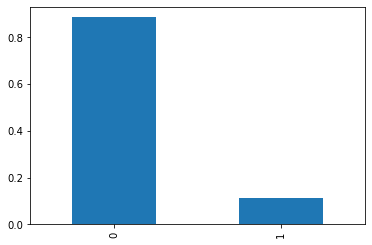

In [3]:
#dataset is highly imbalanced
print(df.is_safe.value_counts())
df.is_safe.value_counts(normalize=True).plot.bar()
plt.show()

In [4]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
X = df.drop(columns=['is_safe']).values
Y = df[['is_safe']].values
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=seed,
                                                    shuffle=True,
                                                    stratify=Y)

print(X.shape)
print(X.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7996, 20)
(7996, 20)
(6396, 20)
(6396, 1)
(1600, 20)
(1600, 1)


In [6]:
#Fitting the sccaler first on training data, and using the same distribution in the test data
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(6396, 20)
(1600, 20)


In [7]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],), name="Input"))
model.add(Dense(12, activation='relu', name="layer1", use_bias=True))
model.add(Dense(48, activation='relu', name="layer2", use_bias=True))
model.add(Dense(8, activation='relu', name="layer3", use_bias=True))
model.add(Dense(1, activation='sigmoid', name="output"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 12)                252       
_________________________________________________________________
layer2 (Dense)               (None, 48)                624       
_________________________________________________________________
layer3 (Dense)               (None, 8)                 392       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 1,277
Trainable params: 1,277
Non-trainable params: 0
_________________________________________________________________


2024-01-14 16:25:43.509424: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 16:25:43.509713: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
es = EarlyStopping(monitor='val_loss',patience=5, verbose=1)

In [9]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16, 
                    validation_data=(x_test,y_test),
                    callbacks=[es])

Train on 6396 samples, validate on 1600 samples
Epoch 1/100
6396/6396 [==============================] - 2s 280us/sample - loss: 0.3290 - accuracy: 0.8774 - val_loss: 0.2547 - val_accuracy: 0.9000
Epoch 2/100
6396/6396 [==============================] - 1s 124us/sample - loss: 0.2265 - accuracy: 0.9128 - val_loss: 0.2257 - val_accuracy: 0.9150
Epoch 3/100
6396/6396 [==============================] - 1s 133us/sample - loss: 0.2006 - accuracy: 0.9243 - val_loss: 0.2081 - val_accuracy: 0.9225
Epoch 4/100
6396/6396 [==============================] - 1s 134us/sample - loss: 0.1817 - accuracy: 0.9323 - val_loss: 0.2026 - val_accuracy: 0.9287
Epoch 5/100
6396/6396 [==============================] - 1s 126us/sample - loss: 0.1688 - accuracy: 0.9365 - val_loss: 0.1884 - val_accuracy: 0.9294
Epoch 6/100
6396/6396 [==============================] - 1s 137us/sample - loss: 0.1568 - accuracy: 0.9409 - val_loss: 0.1759 - val_accuracy: 0.9337
Epoch 7/100
6396/6396 [==============================] - 1

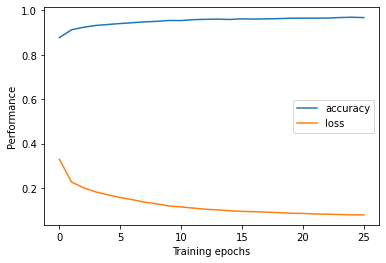

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Training epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [11]:
predictions = model.predict(x_test)
predictions

array([[4.48614359e-04],
       [2.79039145e-04],
       [4.97967005e-04],
       ...,
       [3.42726707e-06],
       [1.67429447e-04],
       [1.21593475e-05]], dtype=float32)

In [12]:
y_pred = [round(x[0]) for x in predictions]
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1418
           1       0.72      0.75      0.73       182

    accuracy                           0.94      1600
   macro avg       0.84      0.86      0.85      1600
weighted avg       0.94      0.94      0.94      1600

